# 9 モデルの検証方法とチューニング方法  練習と総合問題解答

- **[9.1 この章で学ぶこと](#9.1-この章で学ぶこと)**
    - [9.1.1 過学習の対処法とモデルチューニング方法](#9.1.1-過学習の対処法とモデルチューニング方法)
    - [9.1.2 混同行列とROC曲線](#9.1.2-混同行列とROC曲線)
    - [9.1.3 シミュレーションと計算統計学の基礎](#9.1.3-シミュレーションと計算統計学の基礎)
    - [9.1.4 アンサンブル学習](#9.1.4-アンサンブル学習)
<br><br>
- **[9.2 過学習の対処法とモデルチューニング方法](#9.2-過学習の対処法とモデルチューニング方法)** 
    - [9.2.1 ホールドアウト法と交差検証法](#9.2.1-ホールドアウト法と交差検証法)
    - [9.2.2 グリッドサーチ](#9.2.2-グリッドサーチ)
    - [9.2.3 モデル構築期間やその他](#9.2.3-モデル構築期間やその他)
    - [9.2.4 特徴量の扱い](#9.2.4-特徴量の扱い)
<br><br> 
- **[9.3 混同行列とROC曲線](#9.3-混同行列とROC曲線)** 
    - [9.3.1 混同行列](#9.3.1-混同行列)
    - [9.3.2 ROC曲線とAUC](#9.3.2-ROC曲線とAUC)
<br><br>
- **[9.4 シミュレーションと計算統計学の基礎](#9.4-シミュレーションと計算統計学の基礎)**
    - [9.4.1 ジャックナイフ法](#9.4.1-ジャックナイフ法)
    - [9.4.2 ブートストラップ法](#9.4.2-ブートストラップ法)
    - [9.4.3 EMアルゴリズム](#9.4.3-EMアルゴリズム)
<br><br>
- **[9.5 アンサンブル学習](#9.5-アンサンブル学習)**
    - [9.5.1 バギング](#9.5.1-バギング)
    - [9.5.2 ブースティング](#9.5.2-ブースティング)
    - [9.5.3 ランダムフォレスト](#9.5.3-ランダムフォレスト)
<br><br>
- **[9.6 総合問題](#9.6-総合問題)**
    - [9.6.1 総合問題1](#9.6.1-総合問題1)
    - [9.6.2 総合問題2](#9.6.2-総合問題2)

## 9.1 この章で学ぶこと
ゴール：モデルを構築するときの注意点や検証の方法の概要を知る

## 9.2 過学習の対処法とモデルチューニング方法
ゴール：モデルの過学習を防ぎ、より良い予測モデルを構築する方法を知る

### 9.2.1 ホールドアウト法と交差検証法
キーワード：過学習、ホールドアウト法、交差検証法

#### <練習問題 1>

上記のデータに対して、異なるモデル（ロジスティック回帰分析など）を作成し、交差検証を実施してみましょう。上記のモデルの結果と比較して、違いはありますか。

In [19]:
# 解答
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# 分析対象データ
from sklearn.datasets import load_breast_cancer

# データの読み込み
cancer = load_breast_cancer()

lgmodel = LogisticRegression()

# 交差検証法
from sklearn.cross_validation import cross_val_score

# cv　で分割数を決定する。デフォルトは3。
scores = cross_val_score(lgmodel,cancer.data,cancer.target,cv=5)

# 93~97%で高め
print("Cross validation scores:{}".format(scores))
print("Cross validation scores(mean):{:.2f}".format(scores.mean()))

Cross validation scores:[ 0.93043478  0.93913043  0.97345133  0.94690265  0.96460177]
Cross validation scores(mean):0.95


### 9.2.2 グリッドサーチ
キーワード：グリッドサーチ

#### <練習問題 1>

上記のデータに対して、決定木を使って、交差検証とグリッドサーチを実施してみましょう。なお、決定木のパラメータは深さなので、それをparam_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}のように設定して計算しましょう。

In [22]:
# 解答
from sklearn.grid_search import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split

# パラメータの設定
param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}
treemodel = DecisionTreeClassifier()
grid_search = GridSearchCV(treemodel,param_grid,cv=5)

# データの読み込み
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

grid_search.fit(X_train,y_train)

print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))

Test set score:0.92
Best parameters:{'min_samples_leaf': 4, 'max_depth': 4}
Best cross-validation score:0.94


### 9.2.3 モデル構築期間やその他
キーワード：データ期間、プロファイリングモデル、予測モデル、検証データ

### 9.2.4 特徴量の扱い
キーワード：特徴選択、特徴抽出

## 9.3 混同行列とROC曲線
ゴール：混同行列とROC曲線を理解して、実装できる

### 9.3.1 混同行列
キーワード：混同行列、正解率、適合率、再現率、F1値

#### <練習問題 1>

上記のデータに対して、異なるモデル（ロジスティック回帰分析など）を作成し、混同行列を作り、テストデータにおける正解率、適合率、再現率、F1値を計算してみましょう。

In [30]:
# 解答
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# indicators
from sklearn.metrics import precision_score,recall_score,f1_score
# train & test data
from sklearn.cross_validation import train_test_split
# target data
from sklearn.datasets import load_breast_cancer
# confusion matrix
from sklearn.metrics import confusion_matrix

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

model = LogisticRegression()
clf = model.fit(X_train,y_train)

pred_svc = clf.predict(X_test)

print("train(正解率):",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test(正解率):",clf.__class__.__name__ , clf.score(X_test,y_test))

confusion_m = confusion_matrix(y_test,pred_svc)
print("Confution matrix:\n{}".format(confusion_m))
print("適合率:%.3f" % precision_score(y_true=y_test,y_pred=pred_svc))
print("再現率:%.3f" % recall_score(y_true=y_test,y_pred=pred_svc))
print("F1値:%.3f" % f1_score(y_true=y_test,y_pred=pred_svc))

train(正解率): LogisticRegression 0.971830985915
test(正解率): LogisticRegression 0.944055944056
Confution matrix:
[[49  4]
 [ 4 86]]
適合率:0.956
再現率:0.956
F1値:0.956


### 9.3.2 ROC曲線とAUC
キーワード：ROC曲線、AUC

#### <練習問題 1>

irisデータに対して、モデリングを実施（目的変数iris.targetを予測）し、ROC曲線とAUCを計算してみましょう。

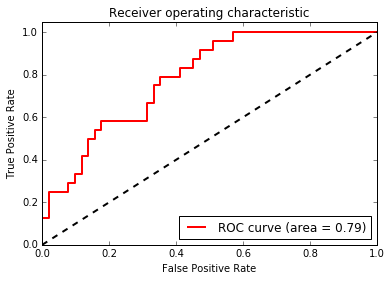

In [34]:
# 解答
#参照URL：http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

#データの準備
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

#モデリング
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

## 9.4 シミュレーションと計算統計学の基礎
ゴール：シミュレーションと計算統計学の基本的な考え方を理解し、簡単な実装できること

### 9.4.1 ジャックナイフ法
キーワード：ジャックナイフ法、交差検証法

### 9.4.2 ブートストラップ法
キーワード：ブートストラップ法、復元抽出

### 9.4.3 EMアルゴリズム
キーワード：EMアルゴリズム、最尤法

## 9.5 アンサンブル学習
ゴール：アンサンブルの基本的な手法（バギング、ブースティング、ランダムフォレスト）について理解して、実装ができること

### 9.5.1 バギング
キーワード：バギング

### 9.5.2 ブースティング
キーワード：ブースティング、アダブースト

### 9.5.3 ランダムフォレスト
キーワード：ランダムフォレスト、特徴量の重要度

## 9.6 総合問題

### 9.6.1 総合問題1

データload_breast_cancerを使って、目的変数をcancer.targetとして、予測モデル（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレスト）を構築し、交差検証（5分割）によりどのモデルが一番良いでしょうか。実装してください。

In [17]:
# 解答
# 交差検証法
from sklearn.cross_validation import cross_val_score

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

# データ
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

for model in [LogisticRegression(),LinearSVC(), 
              DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=6)
             ,RandomForestClassifier()]:
    scores = cross_val_score(model,cancer.data,cancer.target,cv=5)
    print("-- Method:",model.__class__.__name__ ,"--")
    print("Cross validation scores:{}".format(scores))
    print("Cross validation scores(mean):{}".format(scores.mean()))

-- Method: LogisticRegression --
Cross validation scores:[ 0.93043478  0.93913043  0.97345133  0.94690265  0.96460177]
Cross validation scores(mean):0.9509041939207385
-- Method: LinearSVC --
Cross validation scores:[ 0.90434783  0.93043478  0.65486726  0.92035398  0.92920354]
Cross validation scores(mean):0.867841477491343
-- Method: DecisionTreeClassifier --
Cross validation scores:[ 0.91304348  0.93043478  0.92920354  0.95575221  0.89380531]
Cross validation scores(mean):0.9244478645632936
-- Method: KNeighborsClassifier --
Cross validation scores:[ 0.89565217  0.93913043  0.9380531   0.92920354  0.92035398]
Cross validation scores(mean):0.9244786456329358
-- Method: RandomForestClassifier --
Cross validation scores:[ 0.94782609  0.95652174  0.98230088  0.9380531   0.96460177]
Cross validation scores(mean):0.9578607156598693
